In [123]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [124]:
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower

In [125]:
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As = 2e-09, ns=0.965)
#pars.set_for_lmax(2500, lens_potential_accuracy=0);

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.965
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2e-09
 At = 1.0
 

In [126]:
pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)

Note: redshifts have been re-sorted (earliest first)


class: <CAMBparams>
 WantCls = True
 WantTransfer = True
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = True
   accurate_massive_neutrinos = False
   kmax = 2.0
   k_per_logint = 0
   PK_num_redshifts = 2
   PK_redshifts = [0.8, 0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.022
 omch2 = 0.122
 omk = 0.0
 omnuh2 = 0.0006451383989381787
 H0 = 67.5
 TCMB = 2.7255
 YHe = 0.24524332588411976
 num_nu_massless = 2.030666666666667
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0153333333333332]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.965
   nru

In [127]:
results = camb.get_results(pars)

In [128]:
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())

In [129]:
pars.NonLinear = model.NonLinear_both
#results = camb.get_results(pars)
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

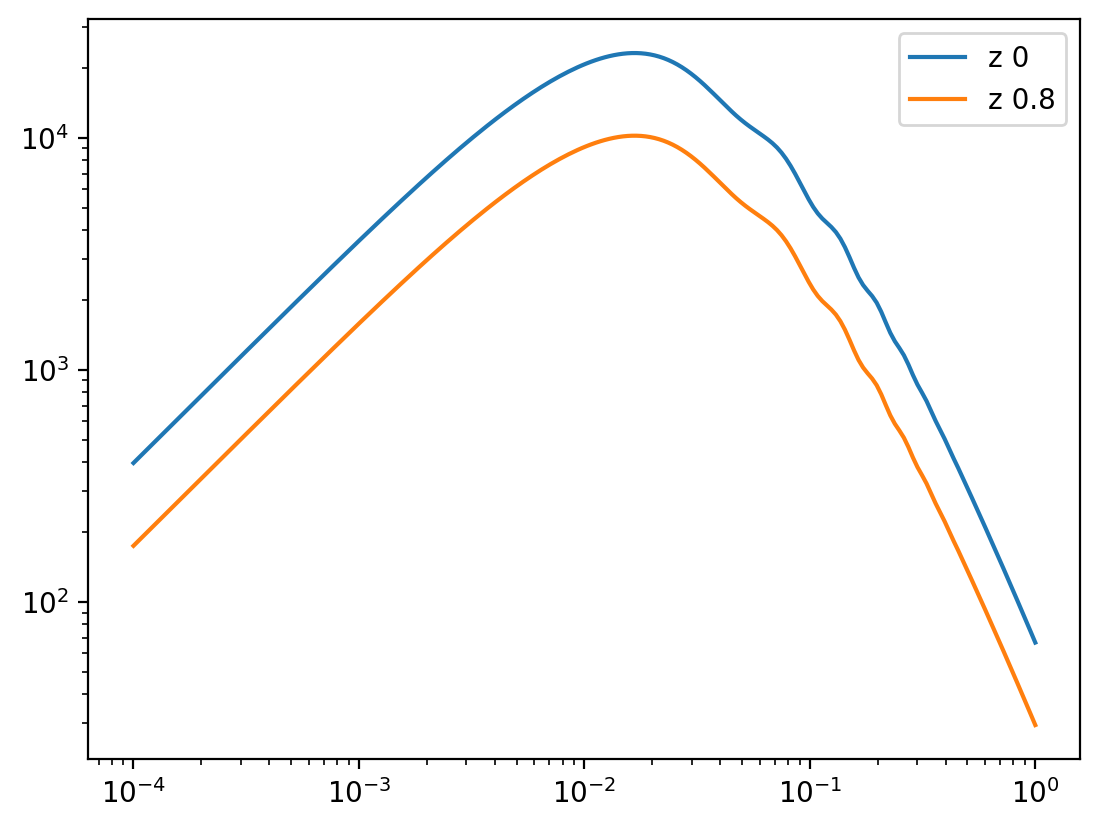

In [130]:
plt.loglog(kh, pk[0], label="z 0")
plt.loglog(kh, pk[1], label="z 0.8")
plt.legend()

In [131]:
pars_massless = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars_massless.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.00, omk=0, tau=0.06)
pars_massless.InitPower.set_params(As = 2e-09, ns=0.965)
#pars.set_for_lmax(2500, lens_potential_accuracy=0);

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.965
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2e-09
 At = 1.0
 

In [132]:
pars_massless.set_matter_power(redshifts=[0., 0.8], kmax=2.0)
;

Note: redshifts have been re-sorted (earliest first)


''

In [133]:
results_massless = camb.get_results(pars_massless)

In [134]:
kh_ml, z_ml, pk_ml = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

In [135]:
pars_massless.NonLinear = model.NonLinear_both
#results_massless = camb.get_results(pars_massless)
results_massless.calc_power_spectra(pars_massless)
kh_ml_nonlin, z_ml_nonlin, pk_ml_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

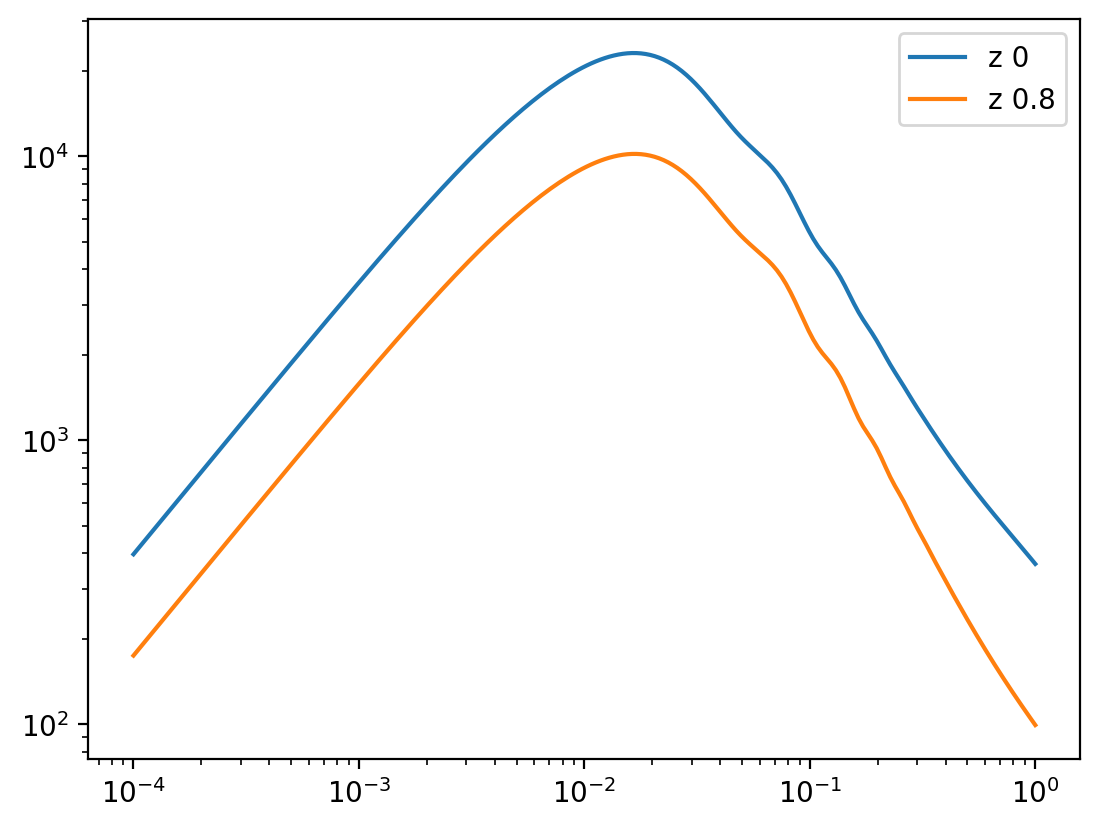

In [136]:
plt.loglog(kh_ml, pk_ml[0], label="z 0")
plt.loglog(kh_ml, pk_ml[1], label="z 0.8")
plt.legend()

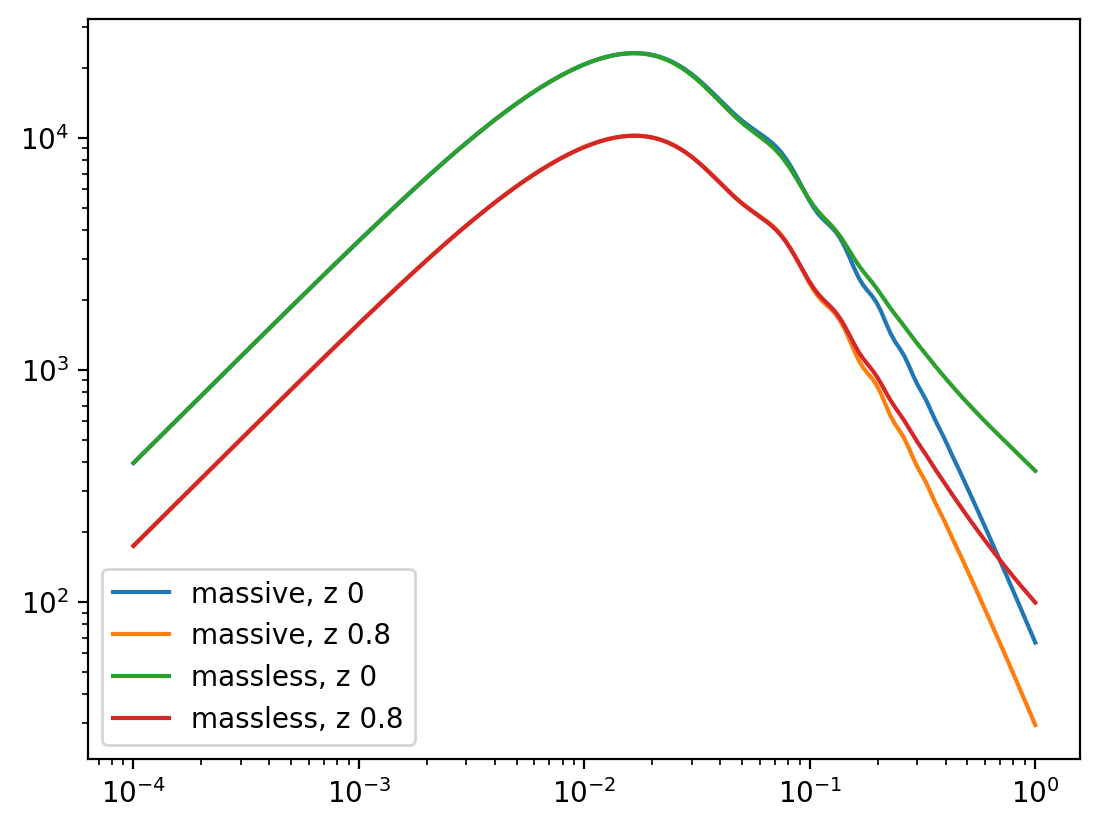

In [137]:
plt.loglog(kh, pk[0], label="massive, z 0")
plt.loglog(kh, pk[1], label="massive, z 0.8")
plt.loglog(kh_ml, pk_ml[0], label="massless, z 0")
plt.loglog(kh_ml, pk_ml[1], label="massless, z 0.8")
plt.legend()

In [138]:
sigma12_massless = results_massless.get_sigmaR(12, hubble_units=False)[1]
print(sigma12_massless)

0.8071834611642374


In [139]:
sigma12_massive = results.get_sigmaR(12, hubble_units=False)[1]
print(sigma12_massive)

0.7958808532009601


In [140]:
As_massless = 2.9e-9 * (sigma12_massless / sigma12_massive) ** 2

In [141]:
As_massless

2.982952884987179e-09

In [142]:
pars_fa = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars_fa.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars_fa.InitPower.set_params(As = 2.982952884987179e-09, ns=0.965)

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.965
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2.982952884987179e-09
 At = 1.0
 

In [143]:
pars_fa.set_matter_power(redshifts=[0], kmax=2.0)
;

''

In [144]:
results_fa = camb.get_results(pars_fa)

In [145]:
results_fa.get_sigmaR(12, hubble_units=False)

array([0.97197122])

IndexError: index 1 is out of bounds for axis 0 with size 1

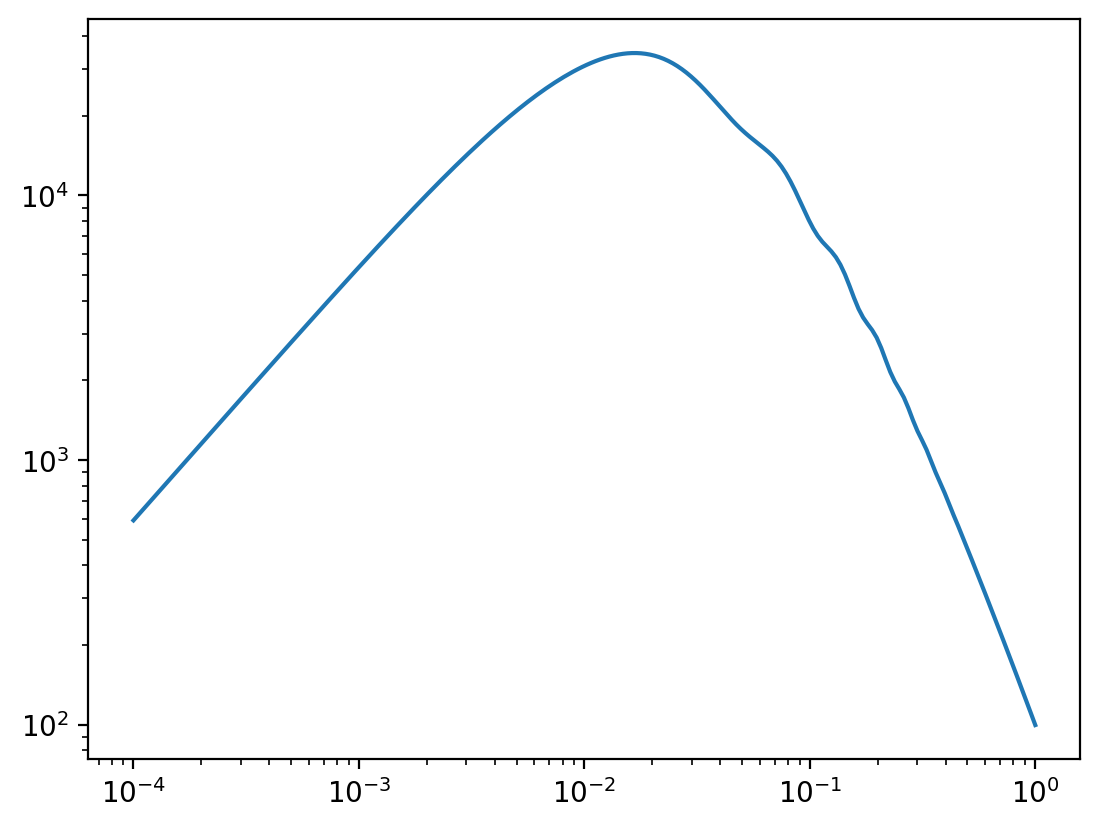

In [146]:
kh_fa, z_fa, pk_fa = results_fa.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
pars_fa.NonLinear = model.NonLinear_both
results_fa.calc_power_spectra(pars_fa)
kh_fa_nonlin, z_fa_nonlin, pk_fa_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
plt.loglog(kh_fa, pk_fa[0], label="z 0")
plt.loglog(kh_fa, pk_fa[1], label="z 0.8")
plt.legend()

In [ ]:
plt.loglog(kh_fa, pk_fa[0], label="massive, z 0")
plt.loglog(kh_fa, pk_fa[1], label="massive, z 0.8")
plt.loglog(kh_ml, pk_ml[0], label="massless, z 0")
plt.loglog(kh_ml, pk_ml[1], label="massless, z 0.8")
plt.legend()